#### **Ibrahim Johar Farooqi**
#### **23K-0074**
#### **ML - Lab 05 - Tasks**

#### **task 01**

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('heart.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.shape

(1025, 14)

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
#count num of missing vals
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
for c in df.columns:
    print(f"{c} --- dtype = {df[c].dtype} --- n.unique = {df[c].nunique()}")

age --- dtype = int64 --- n.unique = 41
sex --- dtype = int64 --- n.unique = 2
cp --- dtype = int64 --- n.unique = 4
trestbps --- dtype = int64 --- n.unique = 49
chol --- dtype = int64 --- n.unique = 152
fbs --- dtype = int64 --- n.unique = 2
restecg --- dtype = int64 --- n.unique = 3
thalach --- dtype = int64 --- n.unique = 91
exang --- dtype = int64 --- n.unique = 2
oldpeak --- dtype = float64 --- n.unique = 40
slope --- dtype = int64 --- n.unique = 3
ca --- dtype = int64 --- n.unique = 5
thal --- dtype = int64 --- n.unique = 4
target --- dtype = int64 --- n.unique = 2


- **categorical features** have only a few distinct values (like *0/1* or *1–4*), representing discrete categories — like male/female, chest pain type, fasting blood sugar > 120 mg/dl, etc.

- **continuous features** have many unique values, often dozens or hundreds - like age, blood pressure, cholesterol, max heart rate.



- if **nunique()** ≤ 5 → likely categorical


- if **nunique()** > 10 → likely continuous

between 6–10 → check manually (could be ordinal coded, like  “education level: 1–5”)

In [9]:
categorical = df.select_dtypes(include=['object', 'category'])
continuous = df.select_dtypes(include=['int64', 'float64'])

print(f"categorical cols:\n{categorical.columns.tolist()}")
print(f"continuous cols:\n{continuous.columns.tolist()}")

categorical cols:
[]
continuous cols:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


*since there are no categorical columns, we dont have to encode any categorical feature*

In [10]:
#checking how many duplicates exist
duplicates = df.duplicated().sum()

print(f"num of duplicated rows: {duplicates}")

num of duplicated rows: 723


*723 rows of duplicated data exist in this dataset, which we will have to remove*

In [11]:
if duplicates > 0:
    df = df.drop_duplicates()
    print("duplicate rows have been dropped.")
    
duplicates = df.duplicated().sum()    
print(f"num of duplicate rows after dropping duplicates: {duplicates}")

duplicate rows have been dropped.
num of duplicate rows after dropping duplicates: 0


- **df.duplicated()** returns a boolean series (True for duplicates).

- **.sum()** counts how many True values there are (like duplicate rows).

- **drop_duplicates()** removes them while keeping the first occurrence by default.

In [12]:
df.shape

(302, 14)

In [13]:
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
correlation = df.corr()

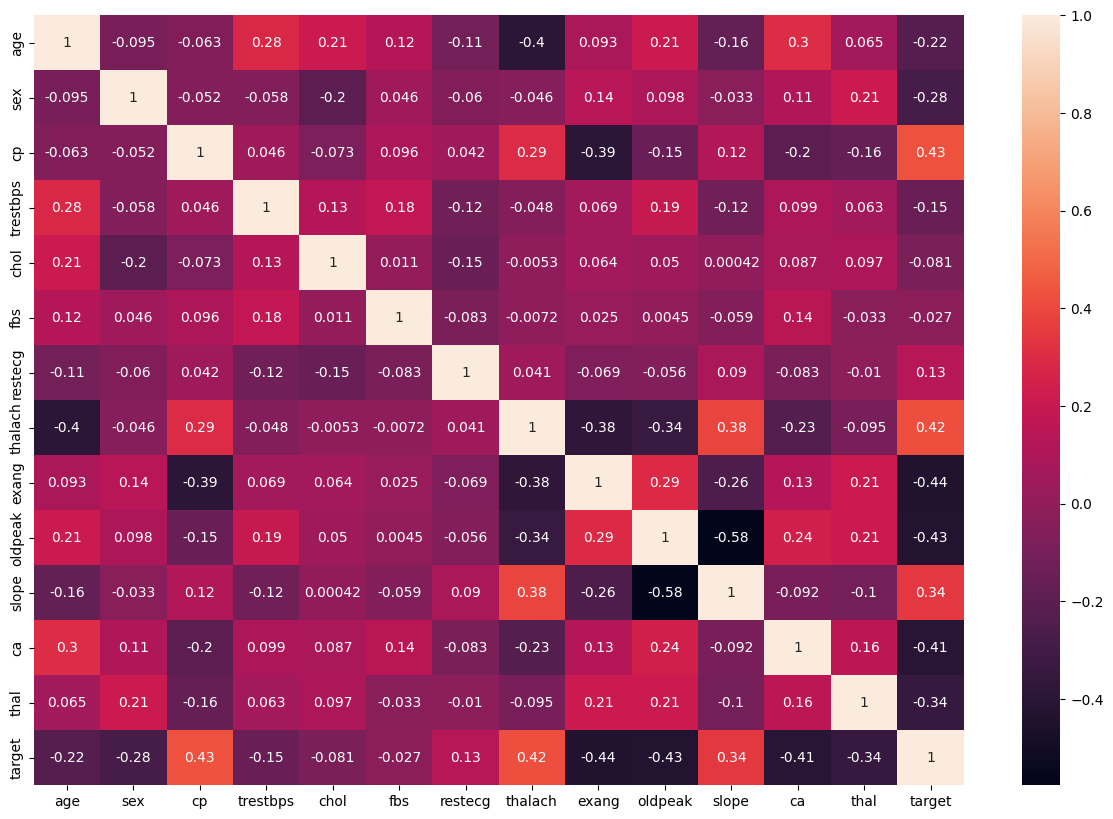

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation, annot=True)
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

#split data into 80% training | 20% testing
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#split the training part into 70% train + 30% validation
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=0)


print(f"train - shape: {X_train_full.shape},{y_train_full.shape}")
print(f"validation - shape: {X_val.shape},{y_val.shape}")
print(f"test - shape: {X_test.shape},{y_test.shape}")

train - shape: (241, 13),(241,)
validation - shape: (73, 13),(73,)
test - shape: (61, 13),(61,)


- 80% → training + validation → 0.8 × 303 ≈ 242 samples
- 20% → testing → 0.2 × 303 ≈ 61 samples
---
- *after split the training portion (242) into*:
- 70% → actual training → ≈ 169 samples
- 30% → validation → ≈ 73 samples

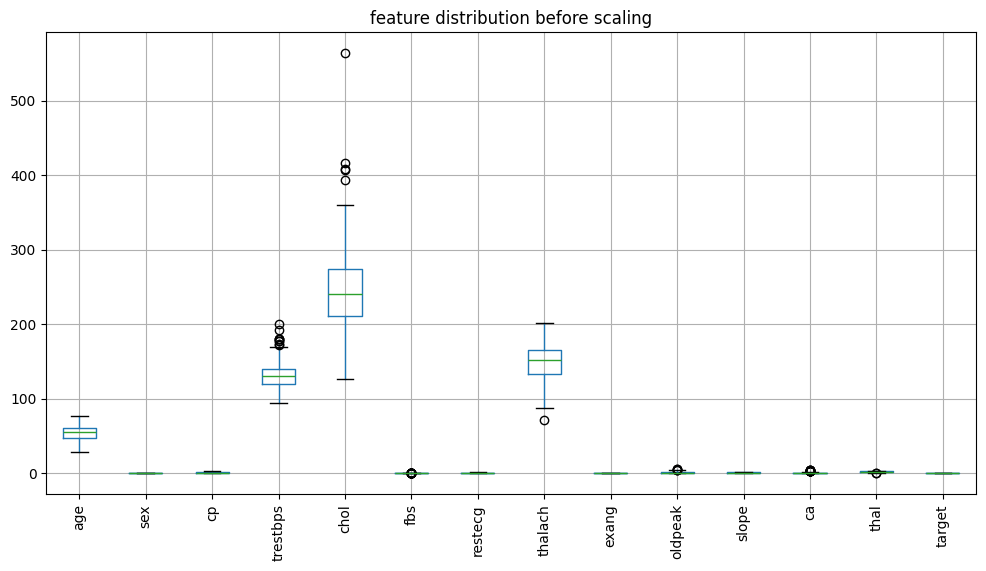

In [18]:
plt.figure(figsize=(12,6))
df.boxplot(rot=90)
plt.title("feature distribution before scaling")
plt.show()

In [19]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#### **scaling**
many machine learning algorithms compute distances, gradients, or weights internally - so if one feature has large values (like cholesterol = 560), it can dominate others (like age = 30).

scaling fixes that by bringing all features to a similar range, usually centered around 0 with standard deviation 1.

by scaling we:
- keep a consistent preprocessing pipeline.
- prevent potential bias if we later add non-tree models.
- ensure numerical stability in algos using gradients.

feature scaling is applied to normalize the range of independent variables so that no single feature dominates others due to its magnitude. although Decision Trees and their ensembles are not sensitive to feature scaling, we still apply it for consistency and to prepare the dataset for future algorithms that rely on distance or gradient-based optimization (like SVM or logistic regression).

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

ada = AdaBoostClassifier(random_state=1)
xgb = XGBClassifier(random_state=1)
rf = RandomForestClassifier(random_state=1)

#ada boost
ada.fit(X_train_scaled, y_train)
ada_test_pred = ada.predict(X_test_scaled)
ada_val_pred = ada.predict(X_val_scaled)

print(f"Ada training accuracy: {ada.score(X_train_scaled, y_train):.2f}")
print(f"Ada testing accuracy: {accuracy_score(y_test, ada_test_pred):.2f}")
print(f"Ada validation accuracy: {accuracy_score(y_val, ada_val_pred):.2f}")

#xgboost
xgb.fit(X_train_scaled, y_train)
xgb_test_pred = xgb.predict(X_test_scaled)
xgb_val_pred = xgb.predict(X_val_scaled)

print(f"\nXGBoost training accuracy: {xgb.score(X_train_scaled, y_train):.2f}")
print(f"XGBoost testing accuracy: {accuracy_score(y_test, xgb_test_pred):.2f}")
print(f"XGBoost validation accuracy: {accuracy_score(y_val, xgb_val_pred):.2f}")

#random forest
rf.fit(X_train_scaled, y_train)
rf_test_pred = rf.predict(X_test_scaled)
rf_val_pred = rf.predict(X_val_scaled)

print(f"\nRandomForest training accuracy: {rf.score(X_train_scaled, y_train):.2f}")
print(f"RandomForest testing accuracy: {accuracy_score(y_test, rf_test_pred):.2f}")
print(f"RandomForest validation accuracy: {accuracy_score(y_val, rf_val_pred):.2f}")

Ada training accuracy: 0.91
Ada testing accuracy: 0.75
Ada validation accuracy: 0.81

XGBoost training accuracy: 1.00
XGBoost testing accuracy: 0.79
XGBoost validation accuracy: 0.82

RandomForest training accuracy: 1.00
RandomForest testing accuracy: 0.80
RandomForest validation accuracy: 0.79


- *AdaBoost* -> most balanced, shows least overfitting amongst the others
- *XGBoost* -> high training accuracy, mild overfitting
- *RandomForest* -> overfits slightly, but performs best out of the remaining on the test data

--

- overall, randomforest - performs best on test data, followed by xgboost, closely.
- adaboost, is the most balanced model with the smallest gap between the training and testing accuracy, which suggests better generalization

#### **task 02**

In [21]:
from sklearn.model_selection import train_test_split

#selecting only the required features
X = df[['restecg', 'oldpeak']] #2 independent features
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=1)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=1)
xgb = XGBClassifier(random_state=1)

In [23]:
estimators_list = [('DT', dt), ('KNN', knn), ('XGB', xgb), ('RF', rf)]

#hard vote
voting_hard = VotingClassifier(estimators=estimators_list, voting='hard')

voting_hard.fit(X_train, y_train)
y_pred_hard = voting_hard.predict(X_test)
accuracy_hard = accuracy_score(y_test, y_pred_hard)

#soft vote
voting_soft = VotingClassifier(estimators=estimators_list, voting='soft')
voting_soft.fit(X_train, y_train)
y_pred_soft = voting_soft.predict(X_test)
accuracy_soft = accuracy_score(y_test, y_pred_soft)

print(f"hard voting accuracy: {accuracy_hard:.3f}")
print(f"soft voting accuracy: {accuracy_soft:.3f}")

hard voting accuracy: 0.607
soft voting accuracy: 0.623


the soft voting classifier (0.623) achieved slightly higher accuracy than the hard voting classifier (0.607). this indicates that soft voting performs better here, as it takes into account the predicted probabilities of each model rather than relying only on the majority vote.

In [24]:
#different weight combinations
weightsList = [
    [1, 1, 1, 1],
    [2, 1, 2, 1],
    [1, 2, 1, 1],
    [1, 1, 2, 1],
    [1, 2, 1, 2],
    [2, 1, 2, 1],
]

for vote_type in ['hard', 'soft']:
    print(f"\nvoting type: {vote_type}")
    for w in weightsList:
        model = VotingClassifier(estimators=estimators_list, voting=vote_type, weights=w)
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        acc = accuracy_score(y_test, pred)
        print(f"weights {w} → test accuracy: {acc:.3f}")


voting type: hard
weights [1, 1, 1, 1] → test accuracy: 0.607
weights [2, 1, 2, 1] → test accuracy: 0.607
weights [1, 2, 1, 1] → test accuracy: 0.607
weights [1, 1, 2, 1] → test accuracy: 0.623
weights [1, 2, 1, 2] → test accuracy: 0.607
weights [2, 1, 2, 1] → test accuracy: 0.607

voting type: soft
weights [1, 1, 1, 1] → test accuracy: 0.623
weights [2, 1, 2, 1] → test accuracy: 0.607
weights [1, 2, 1, 1] → test accuracy: 0.607
weights [1, 1, 2, 1] → test accuracy: 0.623
weights [1, 2, 1, 2] → test accuracy: 0.623
weights [2, 1, 2, 1] → test accuracy: 0.607


both hard and soft voting gave similar accuracies, but the soft voting method slightly outperformed hard voting (0.623 vs 0.607). suggesting that using the predicted probabilities (soft voting) helped combine the strengths of the base learners more effectively.

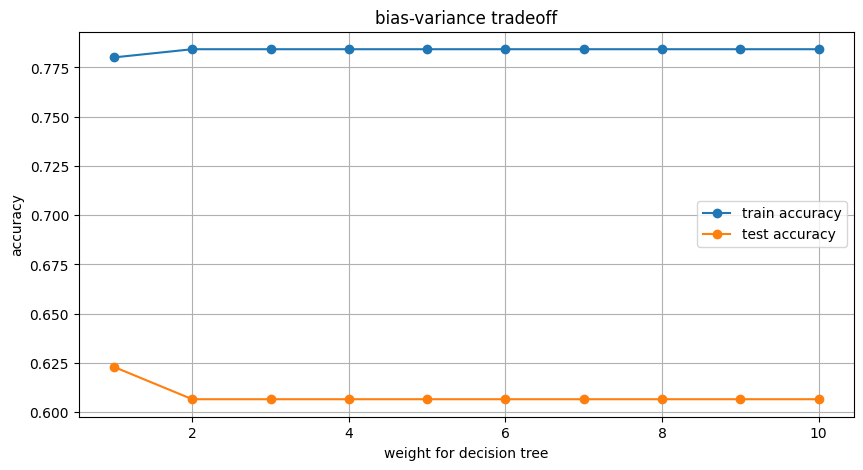

In [25]:
train_scores = []
test_scores = []
weights = range(1,11)

for w in weights:
    model = VotingClassifier(estimators=estimators_list, voting='soft', weights=[w, 1, 1, 1])
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))
    
plt.figure(figsize=(10,5))
plt.plot(weights, train_scores, label='train accuracy', marker='o')
plt.plot(weights, test_scores, label='test accuracy', marker='o')

plt.xlabel("weight for decision tree")
plt.ylabel("accuracy")
plt.title("bias-variance tradeoff")
plt.legend()
plt.grid(True)

plt.show()

#### **task 03**

In [28]:
X = df[['restecg', 'chol']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

ada = AdaBoostClassifier(random_state=1)
rf = RandomForestClassifier(random_state=1)

#adaboost
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)

ada_training_accuracy = ada.score(X_train, y_train)
ada_testing_accuracy = accuracy_score(y_test, ada_pred)

print(f"ada training: {ada_training_accuracy:.2f}")
print(f"ada testing: {ada_testing_accuracy:.2f}")

#rf
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_training_accuracy = rf.score(X_train, y_train)
rf_testing_accuracy = accuracy_score(y_test, rf_pred)

print(f"rf training: {rf_training_accuracy:.2f}")
print(f"rf testing: {rf_testing_accuracy:.2f}")


#hard voting
estimators_list = [('ADA', ada), ('RF', rf)]
model = VotingClassifier(estimators=estimators_list, voting='hard')

model.fit(X_train, y_train)
model_pred = model.predict(X_test)

hard_training_accuracy = model.score(X_train, y_train)
hard_testing_accuracy = accuracy_score(y_test, model_pred)

print(f"\nhard training: {hard_training_accuracy:.2f}")
print(f"hard testing: {hard_testing_accuracy:.2f}")


#soft voting
estimators_list = [('ADA', ada), ('RF', rf)]
model2 = VotingClassifier(estimators=estimators_list, voting='soft')

model2.fit(X_train, y_train)
model2_pred = model2.predict(X_test)

soft_training_accuracy = model2.score(X_train, y_train)
soft_testing_accuracy = accuracy_score(y_test, model_pred)

print(f"\nsoft training: {soft_training_accuracy:.2f}")
print(f"soft testing: {soft_testing_accuracy:.2f}")

ada training: 0.60
ada testing: 0.44
rf training: 0.88
rf testing: 0.62

hard training: 0.69
hard testing: 0.46

soft training: 0.87
soft testing: 0.46


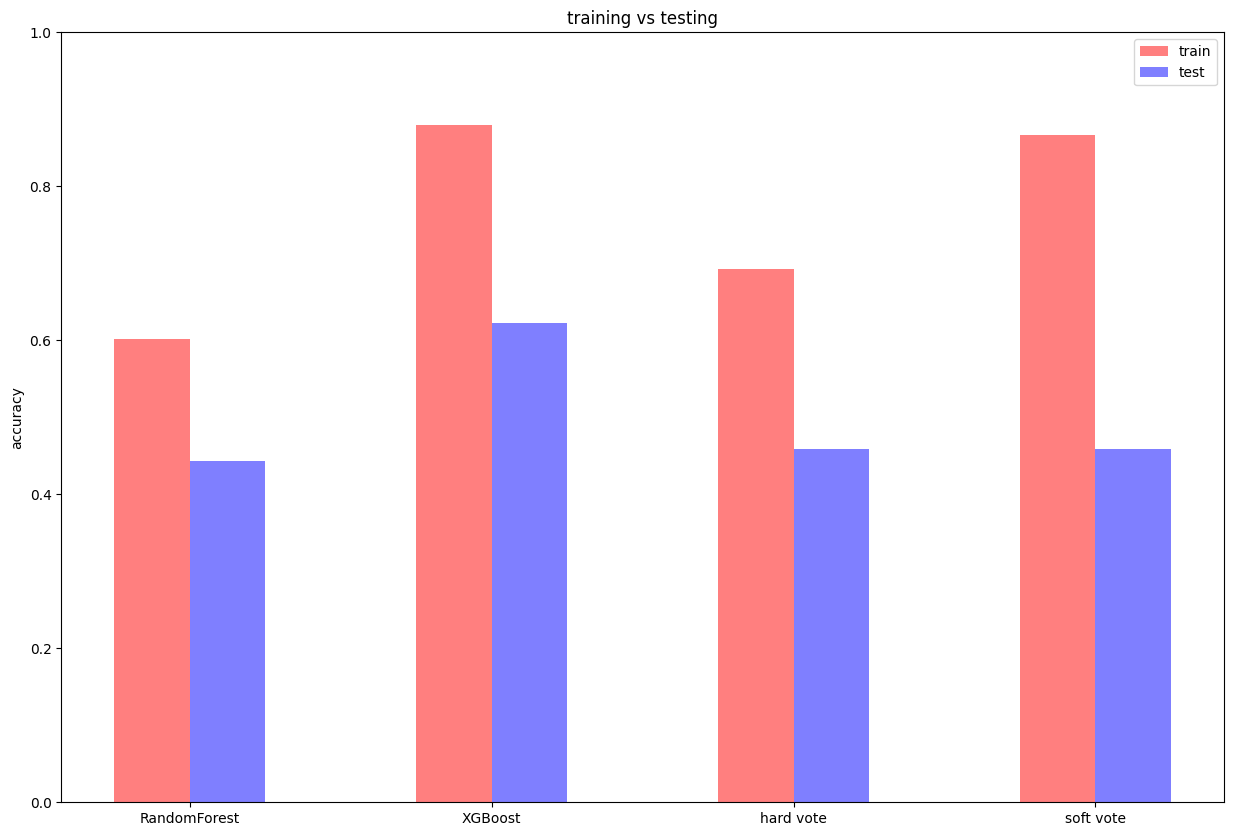

In [30]:
models = ['RandomForest', 'XGBoost', 'hard vote', 'soft vote']
train_acc = [ada_training_accuracy, rf_training_accuracy, hard_training_accuracy, soft_training_accuracy]
test_acc = [ada_testing_accuracy, rf_testing_accuracy, hard_testing_accuracy, soft_testing_accuracy]

plt.figure(figsize=(15,10))
x = range(len(models))
bar_width = 0.25
plt.bar(x, train_acc, width=bar_width, color='red', alpha=0.5, label='train')
plt.bar([i + bar_width for i in x], test_acc, width=bar_width, color='blue', alpha=0.5, label='test')
plt.xticks([i + bar_width/2 for i in x], models)
plt.ylim(0,1)
plt.ylabel('accuracy')
plt.title('training vs testing')
plt.legend()
plt.show()
